# Tweet Clustering for Topic Modeling and Keyword Generation

# Import all necessary libraries

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

# Read the 3 trending topic tweets

In [0]:
data1 = pd.read_csv("usopen.csv",error_bad_lines=False, usecols =["Tweet"])
data1.head()

,Tweet
0,RT @bbctennis: Johanna Konta is into the third...
1,RT @ATP_Tour: .@stanwawrinka advances. 🏃 \n\nT...
2,"Flipkens getting a lot of balls back, but Andr..."
3,RT @usopen: On tap in Ashe...\n\nSimona Halep ...
4,RT @2010MisterChip: Hasta a un tipo como Feder...


In [0]:
data2 = pd.read_csv("modi.csv",error_bad_lines=False, usecols =["Tweet"])
data2.head()

,Tweet
0,#SaveKashmir\nजंग होने पर नेता अपनी जान बचाते ...
1,"RT @indusdotnews: #Modi, the “butcher of Gujra..."
2,RT @SaeedShah: India’s preliminary list of cit...
3,RT @Mohamme91443915: #SaveKashmir\nजंग होने पर...
4,RT @manish28002880: Best journalist of India ?...


In [0]:
data3 = pd.read_csv("saaho.csv",error_bad_lines=False, usecols =["Tweet"])
data3.head()

,Tweet
0,RT @Prabhas_Team: Narsapuram #PrabhasFans Hung...
1,RT @pubzudarlingye: #Prabhas talks about how @...
2,RT @vvsnraju24: Get ready to witness the bigge...
3,RT @elurucnu: #RebelStar #Prabhas welcome to c...
4,RT @CMRamesh_MP: Best wishes to Rebel Star #Pr...


# Concatenate all 3 dataframes into 1 

In [0]:
data_m = pd.concat([data1, data2], ignore_index=True)

In [0]:
data = pd.concat([data_m, data3])
data

,Tweet
0,RT @bbctennis: Johanna Konta is into the third...
1,RT @ATP_Tour: .@stanwawrinka advances. 🏃 \n\nT...
2,"Flipkens getting a lot of balls back, but Andr..."
3,RT @usopen: On tap in Ashe...\n\nSimona Halep ...
4,RT @2010MisterChip: Hasta a un tipo como Feder...
5,RT @usopen: Sunny with a chance of tennis. 😍\n...
6,Watch video as C. Ronaldo Invites Lionel Messi...
7,super @andreapetkovic ‼️👍👏#USOpen🎾
8,Esta noche juega Nick Kyrgios #USOpen #Tennis ...
9,"RT @WeAreTennisITA: ""Devo stare più attento e ..."


In [0]:
data = pd.read_csv('randomt.csv',error_bad_lines=False, usecols =["Tweet"])
print(data.head())

                                               Tweet
0  @USGOVIgnorance @kip73563260 @saad_2001 @BondA...
1  Baer Chain Global Node Teams Accelerated the D...
2  #The imperial, the Derg &amp; the Wayene despo...
3  https://t.co/Uu5spsmWnB\n#Famous Astrologer in...
4  RT @shorthebanks: Father’s Day sale is here! E...


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 99
Data columns (total 1 columns):
Tweet    300 non-null object
dtypes: object(1)
memory usage: 4.7+ KB


# Find and Remove duplicate tweets

In [0]:
data[data['Tweet'].duplicated(keep=False)].sort_values('Tweet').head(8)

,Tweet
96,RT @ATPMediaInfo: [23] @StanWawrinka defeats J...
27,RT @ATPMediaInfo: [23] @StanWawrinka defeats J...
28,RT @ATPMediaInfo: [23] @StanWawrinka defeats J...
77,RT @ATPMediaInfo: [23] @StanWawrinka defeats J...
99,RT @ATPTour_ES: ¡El sudor tiene recompensa! 😎 ...
97,RT @ATPTour_ES: ¡El sudor tiene recompensa! 😎 ...
92,RT @ATPTour_ES: ¡El sudor tiene recompensa! 😎 ...
86,RT @ATPTour_ES: ¡El sudor tiene recompensa! 😎 ...


In [0]:
data = data.drop_duplicates('Tweet')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 96
Data columns (total 1 columns):
Tweet    208 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


# NLP

# Preprocessing
## Removing Stop Words, Stemming, Lemmatization

In [0]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['Tweet'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [0]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[50:60])

1518
['55am', '63', '64', '67', '71', '74', '77k4t6wo5q', '7jq2o1zxzf', '7rbsvtachb', '7th']


In [0]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

def tokenize1(text):
    return [lemmatizer.lemmatize(word, wordnet.VERB) for word in tokenizer.tokenize(text.lower())]

In [0]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize1)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50])

1355
["'modi", "'s", "'who", "'wow", 'aa', 'aanvangstijd', 'aartitikoo', 'abd', 'aber', 'abhishekam', 'abu', 'ac', 'accede', 'acchedin', 'account', 'action', 'ad', 'adb', 'ade', 'adorable', 'advance', 'affiliate', 'afforestation', 'africa', 'ag', 'agenda', 'agnathavasi', 'agustin', 'agy', 'ahora', 'aik', 'aim', 'air', 'aisaynahichalayga', 'aisy', 'aithe', 'ajazkhanactor', 'akhand', 'akhtar', 'akkians', 'akkiinheart', 'akshaykumar', 'al', 'alert', 'alexandrova', 'alexzverev', 'alienate', 'aljaz', 'aljazbedene', 'allthebestforsaahofromaafans']


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# Clustering

## Determining the optimal value of k(number of clusters) using The Elbow Method

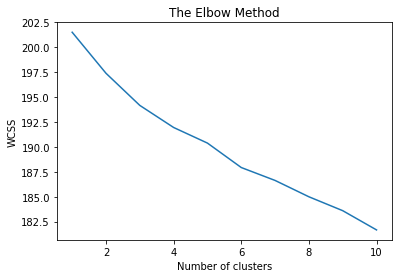

In [0]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [0]:
print(words[250:300])

['dog', 'domin', 'don', "don't", 'donaldtrump', 'drama', 'draw', 'drb', 'drshamamohd', 'dual', 'dubai', 'dvvmovi', 'dxok', 'dzumhur', 'e', 'eae', 'east', 'easwx', 'eat', 'economi', 'economictim', 'ee', 'eedidhi', 'een', 'eeswartosaaho', 'effac', 'effect', 'egl', 'eigen', 'ein', 'einen', 'eiv', 'ejemplar', 'el', 'electrolyt', 'elina', 'elinasvitolina', 'ell', 'elurucnu', 'emmanuelmacron', 'en', 'end', 'enter', 'entir', 'environ', 'eow', 'er', 'eras', 'es', 'espa']


# 3 Clusters

In [0]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : prabha, saaho, rt, team, wish, worldsaahoday, https, t, fan, best, darl, saahocelebr, celebr, love, entir, ticket, saahomania, prabhasfan, blockbust, success, cinema, half, excel, today, uv
1 : t, rt, https, usopen, modi, saaho, kashmir, india, savekashmir, en, k, s, lo, bolnew, la, open, e, amp, osaka, c, set, list, like, l, day
2 : usopen, stan, wawrinka, chardi, r, jeremi, match, stanwawrinka, reach, https, seed, t, set, champion, tour, final, defeat, anoth, townsend, taylor, simona, au, cramp, unbeaten, extend


# 5 Clusters

In [0]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : usopen, t, https, osaka, rt, homeoftenni, set, naomi, super, stanwawrinka, eurosport, round, match, final, play, ball, l, berrettini, tenni, sunni, margarita, konta, andreapetkov, deuc, honey
1 : prabha, saaho, rt, team, wish, https, t, worldsaahoday, fan, darl, best, saahocelebr, celebr, love, entir, saahomania, prabhasfan, success, shraddhakapoor, uv, rahul, rebelstar, cinema, saahofromtomorrow, telugu
2 : modi, rt, kashmir, india, savekashmir, t, https, fit, indian, mohamm, narendramodi, amp, life, fitindiamov, bolnetwork, pakistan, pakistani, bolnew, raeeakram, trendpspk, u, presid, k, crore, govern
3 : stan, usopen, wawrinka, chardi, jeremi, r, el, match, reach, t, stanwawrinka, https, en, champion, seed, del, set, y, tour, la, defeat, th, rt, djokov, au
4 : saaho, t, https, rt, lo, start, list, action, ticket, c, cinema, s, k, premier, d, scene, open, grand, avail, dm, v, contestalert, showtim, dubai, bolnew
